In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
test_result = pd.read_csv('logistic-regression.csv')
test_result.head(3)

,hours,result
0,0,0
1,0,0
2,0,0


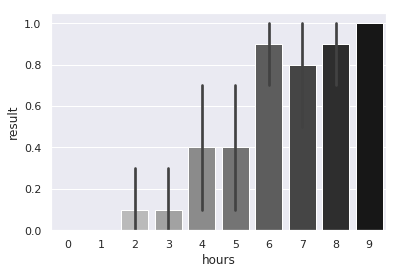

In [3]:
sns.barplot(
    x='hours',
    y='result',
    data=test_result,
    palette='gray_r'
)

In [4]:
test_result.groupby('hours').mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


In [5]:
mod_glm = smf.glm(
    formula='result~hours',
    data=test_result,
    family=sm.families.Binomial()
).fit()

In [6]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sat, 05 Jan 2019   Deviance:                       68.028
Time:                        04:20:06   Pearson chi2:                     84.9
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [7]:
mod_glm_null = smf.glm(
    'result~1',
    data=test_result,
    family=sm.families.Binomial()
).fit()

In [8]:
# Nullモデル
mod_glm_null.aic.round(3)

139.989

In [9]:
# 変数入りモデル
mod_glm.aic.round(3)

72.028

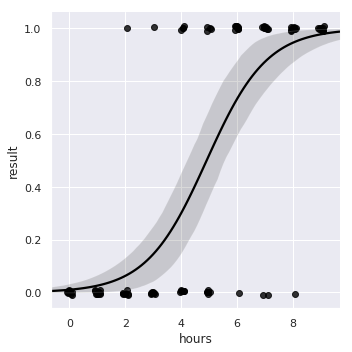

In [10]:
sns.lmplot(
    x='hours',
    y='result',
    data=test_result,
    logistic=True,
    scatter_kws={'color': 'black'},
    line_kws={'color': 'black'},
    x_jitter=0.1,
    y_jitter=0.01
)

In [11]:
exp_val = pd.DataFrame({
    'hours': np.arange(0, 10, 1)
})
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [12]:
exp_val_1 = pd.DataFrame({'hours': [1]})
pred_1 = mod_glm.predict(exp_val_1)
exp_val_2 = pd.DataFrame({'hours': [2]})
pred_2 = mod_glm.predict(exp_val_2)

odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

sp.log(odds_2 / odds_1)

array([0.929])

In [13]:
mod_glm.params['hours']

0.9288901756284946

In [14]:
sp.exp(mod_glm.params['hours'])

2.5316978778757737